

```
API Call function setup
```



In [ ]:
from IPython.display import clear_output
!pip install openai # import the GPT API
from google.colab import userdata # import the secret key
clear_output()
import time

In [ ]:
!pip install pandas
!pip install openpyxl

In [ ]:
from openai import OpenAI

def API_call(model, openAI_key, conversation_history, temperature=0.7, top_p=0.7):
    """
    Creates a call to the API
    Takes in a model to choose which API
    Returns the API response (str)
    """
    if model.startswith("gpt"):
        client = OpenAI(api_key=openAI_key)
        response = client.chat.completions.create(
            model=model,
            messages=conversation_history,
            temperature=temperature,
            top_p=top_p
        )
        return response.choices[0].message.content
    else:
        raise ValueError(f"Error, model {model} not found")

In [ ]:
OPENAI_API_KEY = userdata.get('OPENAI_KEY')

Defining System Prompt

In [ ]:
research_q = "It is your turn to add a post-it note using green hat"

In [ ]:
# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{research_q}
'''

Generating Ideas

In [ ]:
import pandas as pd

try:
    df = pd.read_excel('/content/exp3.xlsx', sheet_name='Sheet1')
except FileNotFoundError:
    df = pd.DataFrame(columns=['ideas'])

In [ ]:
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}

model = models["gpt4-o"]


# Initialize conversation history
conversation_history = [{"role": "system", "content": "You are a helpful assistant."}]
responses = []

# **Clear existing dataframe or create a new one**
#df = pd.DataFrame(columns=['ideas'])

df = df.drop(df.index)  # Clear the DataFrame

# Generate 50 responses
for i in range(50):

    recent_history = conversation_history[-15:]  # Adjust the number as needed

    # Create the request with the recent history
    request_history = recent_history.copy()
    request_history.append({"role": "user", "content": prompt})

    response = API_call(model, OPENAI_API_KEY, request_history)
    responses.append(response)

    # Add the assistant's response to the full conversation history
    conversation_history.append({"role": "assistant", "content": response})

    time.sleep(10)


# Save responses to DataFrame
df['ideas'] = responses

# Save DataFrame to Excel file
df.to_excel('/content/exp3.xlsx', index=False, engine='openpyxl')

# Optional: Download the file to your local machine
from google.colab import files
files.download('/content/exp3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
with open('/content/conversation_history.txt', 'w') as file:
    for entry in conversation_history:
        role = entry['role']
        content = entry['content']
        file.write(f"{role}: {content}\n")

# Optional: Download the file to your local machine (if using Google Colab)
from google.colab import files
files.download('/content/conversation_history.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install sentence_transformers

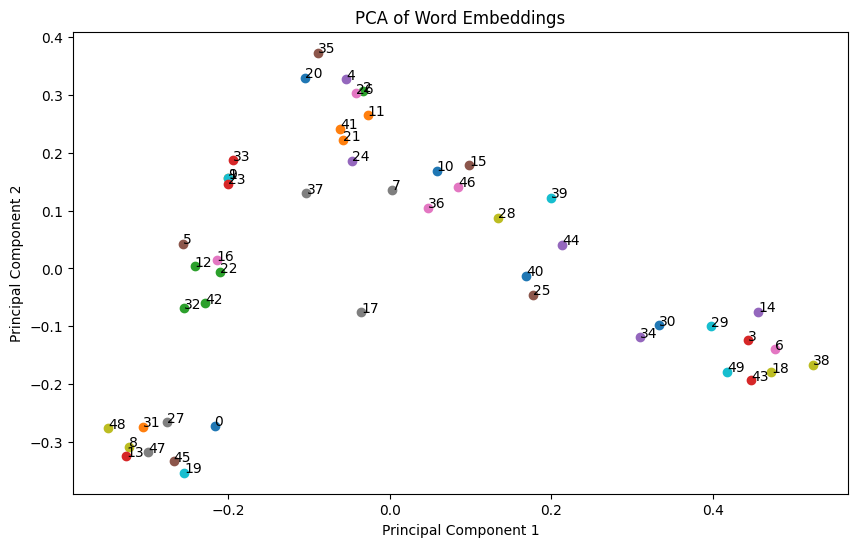

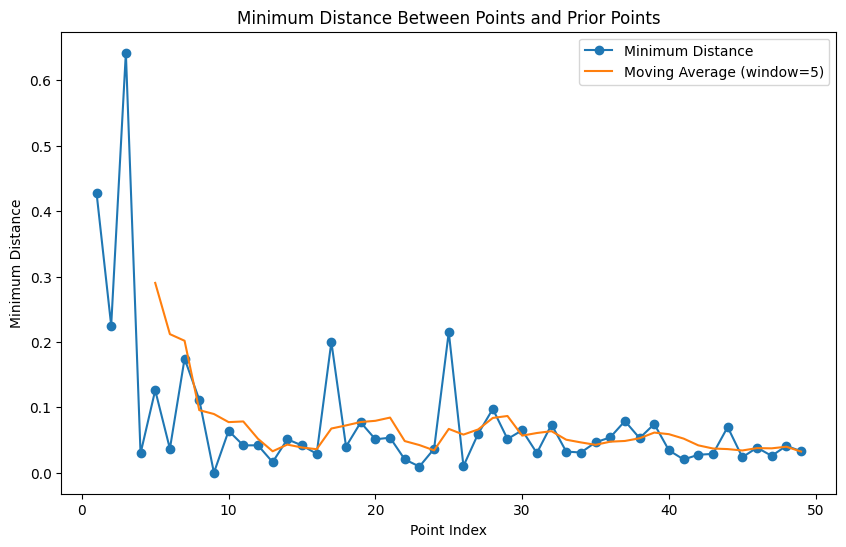

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Extract the "ideas" column
ideas = df['ideas']

# Define a variable X for the number of rows to perform embedding on
X = 50  # Change this value to the desired number of rows
ideas_subset = ideas[:X]

# Perform word embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(ideas_subset)
df['vectors'] = embeddings.tolist()


# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the embedded vectors
plt.figure(figsize=(10, 6))
for i, point in enumerate(pca_result):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i))
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute the minimum distance between each point and all prior points
min_distances = []
for i in range(1, len(pca_result)):
    distances = [np.linalg.norm(pca_result[i] - pca_result[j]) for j in range(i)]
    min_distances.append(min(distances))

# Calculate the moving average of the minimum distances
window_size = 5  # Change this to your desired window size
moving_average = pd.Series(min_distances).rolling(window=window_size).mean()

# Plot the minimum distances and the moving average
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(min_distances) + 1), min_distances, marker='o', label='Minimum Distance')
plt.plot(range(1, len(min_distances) + 1), moving_average, label=f'Moving Average (window={window_size})')
plt.title('Minimum Distance Between Points and Prior Points')
plt.xlabel('Point Index')
plt.ylabel('Minimum Distance')
plt.legend()
plt.show()


# Save DataFrame to Excel file
df.to_excel('/content/exp3.xlsx', index=False, engine='openpyxl')

Now adding ideas with constraints

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $1"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Interactive Cyberbullying Awareness Posters

Description: Let's creatively explore the idea of developing interactive cyberbullying awareness posters that can be placed in schools, community centers, and public spaces. These posters would feature QR codes that, when scanned with a smartphone, lead to engaging, educational content such as short videos, infographics, or mini-games about cyberbullying. The content could include real-life stories, tips for recognizing and dealing with cyberbullying, and resources for getting help. By combining traditional awareness posters with interactive digital elements, we can make the information more engaging and accessible, especially for younger audiences who are accustomed to using smartphones. This approach leverages the low cost of printing posters and the widespread availability of smartphones to create a powerful and cost-effective educational tool for raising awareness about cyberbullying.


In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $10"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Cyberbullying Escape Room Kit

Description: Let's explore the idea of creating a low-cost, DIY Cyberbullying Escape Room Kit that can be used in classrooms or community centers. The kit would include printable puzzles, clues, and scenarios related to cyberbullying, designed to educate participants about the issue in an engaging and interactive way. For example, one puzzle might involve decoding a series of messages to identify cyberbullying behavior, while another could require participants to solve riddles to unlock resources for victims. The escape room experience would foster teamwork, critical thinking, and empathy, making the learning process both fun and impactful. By keeping the cost low—around $10 for materials and printing—we can make this educational tool accessible to a wide audience, encouraging schools and community groups to incorporate it into their programs. This creative approach leverages the popularity of escape rooms to explore a new, engaging way to a

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $100"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Cyberbullying Awareness Comic Book

Description: Let's explore the idea of creating a Cyberbullying Awareness Comic Book that can be distributed in schools and community centers. This comic book would feature engaging stories and characters that children and teenagers can relate to, depicting various scenarios of cyberbullying and showing positive ways to handle them. The comic could include interactive elements, such as activities or discussion questions at the end of each story, encouraging readers to reflect on the issues and think critically about their online behavior. The cost of producing a simple, high-quality comic book could be kept under $100 by leveraging digital printing services and distributing it in PDF format for schools to print locally. This creative approach uses storytelling and visual art to educate young people about cyberbullying in an engaging and accessible way, fostering empathy and promoting positive online interactions.


In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $1000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Interactive Cyberbullying Prevention Workshops

Description: Let's explore the idea of organizing Interactive Cyberbullying Prevention Workshops for schools and community centers. These workshops would combine hands-on activities, role-playing scenarios, and expert-led discussions to educate participants about the impacts of cyberbullying and effective strategies for prevention and intervention. The $1000 budget could cover the cost of materials, expert speakers, and interactive tools such as VR headsets or tablets for immersive learning experiences. By engaging students, teachers, and parents in dynamic and interactive sessions, we can foster a deeper understanding of cyberbullying, promote empathy, and equip participants with practical skills to handle cyberbullying situations. This creative approach leverages the power of interactive learning to address cyberbullying in a meaningful and impactful way.


In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $10,000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: AI-Driven Interactive Storytelling App

Description: Let's explore the idea of developing an AI-driven interactive storytelling app designed to educate users about cyberbullying through immersive narratives. This app would allow users to engage in dynamic stories where they can make choices and experience the consequences from multiple perspectives, including the victim, the bully, and the bystander. The AI would generate personalized scenarios based on user input, creating a unique and emotionally engaging experience for each user. The app could also include reflective questions and real-time feedback to guide users toward empathetic and supportive behaviors. By leveraging AI and interactive storytelling, we can create a powerful educational tool that fosters a deeper understanding of cyberbullying and promotes positive online interactions. The $10,000 budget could cover the development costs, including AI integration, narrative design, and initial marketing efforts to r

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $100,000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: AI-Driven Personalized Cyberbullying Prevention App

Description: Let's explore the idea of developing an AI-driven personalized cyberbullying prevention app. This app would use advanced machine learning algorithms to monitor users' online interactions across various platforms, such as social media, messaging apps, and forums. The AI would analyze the content and context of these interactions to detect potential cyberbullying incidents in real-time. When suspicious activity is identified, the app could provide immediate interventions, such as sending alerts to the user, offering coping strategies, or connecting them with a support network.

Additionally, the app could include educational modules tailored to the user's age and experiences, helping them understand the dynamics of cyberbullying and teaching them how to respond effectively. The app could also feature interactive scenarios and role-playing exercises to build empathy and resilience. By leveraging AI technology,

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $1,000,000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Nationwide AR Cyberbullying Awareness Campaign

Description: Let's explore the idea of launching a nationwide Augmented Reality (AR) Cyberbullying Awareness Campaign. This campaign would use AR technology to create interactive experiences that educate people about the impacts of cyberbullying. Users could scan posters, billboards, or even school hallways with their smartphones to unlock immersive AR scenarios that depict real-life cyberbullying situations. These scenarios would allow users to interact with virtual characters, make decisions, and see the consequences of their actions, fostering empathy and understanding.

The campaign could also include AR workshops in schools and community centers, where participants can engage in guided experiences and discussions led by trained facilitators. Additionally, we could develop an AR app that provides resources, tips, and support for both victims and bystanders of cyberbullying.

The $1,000,000 budget would cover the developm

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $10,000,000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: AI-Driven Global Cyberbullying Detection Network

Description: Let's explore the idea of developing an AI-driven global cyberbullying detection network. This network would leverage advanced machine learning algorithms to monitor and analyze online interactions across multiple platforms, such as social media, messaging apps, forums, and gaming environments, on a global scale. The AI would be trained to detect various forms of cyberbullying, including subtle and context-specific behaviors, in real-time. When potential cyberbullying incidents are identified, the system could take immediate actions, such as flagging the content for review, notifying platform moderators, and providing automated support messages to victims.

The network would also include a centralized database to track incidents, analyze trends, and generate reports to inform policy-making and prevention strategies. Additionally, it could integrate with educational programs to provide real-time feedback and re

In [ ]:
constraint = "It is your turn to add a post-it note using green hat. Give me an idea that costs $100,000,000"

# Here is an example prompt (provided by David in class)
prompt = f'''You are part of a team brainstorming session aimed at generating ideas for tackling cyberbullying. This is the first stage where people are freely throwing out ideas. Later, we will narrow these ideas down. When it's your turn, you should add one new post-it note onto the collective brainstorming whiteboard, describing an idea or direction for addressing cyberbullying. You can also describe the post-it note to your team members.

1. What is Cyberbullying?
Cyberbullying refers to the use of digital technologies, such as the internet, social media platforms, and mobile devices, to harass, threaten, embarrass, or target another person. It can take many forms, including:
Sending threatening or mean messages.
Spreading rumors or lies about someone online.
Posting hurtful or inappropriate pictures or videos.
Creating fake profiles or websites to mock or harass someone.
Excluding someone from an online group or activity deliberately.

2. Scope and Scale of the Problem:
Prevalence: Cyberbullying is a widespread issue affecting children, teenagers, and adults across various demographics.
Platforms: It occurs on social media platforms (like Facebook, Instagram, Twitter), messaging apps (like WhatsApp, Snapchat), forums, and even through emails.
Psychological Impact: Victims often experience anxiety, depression, low self-esteem, and in severe cases, suicidal thoughts.

3. Characteristics of Cyberbullying:
Anonymity: Perpetrators can hide behind fake profiles, making it difficult to identify them.
24/7 Nature: Unlike traditional bullying, cyberbullying can occur at any time and can be pervasive due to the constant connectivity of digital devices.
Wide Audience: Harmful content can be shared with a large audience quickly, exacerbating the victim's distress.

Desired Outcomes
1. Awareness and Education
2. Prevention
3. Detection and Intervention
4. Legal and Policy Frameworks:
5. Support and Rehabilitation,
and so on.

Additionally, you will be asked to wear a particular "hat" for brainstorming:
YELLOW HAT: You take an optimistic, "yes, and" approach to building on the ideas of others. You might focus on a specific aspect of an idea you like or try to turn an idea that sounds unworkable into one that could succeed.
WHITE HAT: You share objective information that might inform ideas, and then use this information to suggest a direction. The information shared could relate to user needs or the broader societal context that might guide the team's decisions.
GREEN HAT: You focus on creatively exploring the design space, aiming to help the team consider areas that have not yet been explored. You are not afraid to suggest ideas that might seem unconventional or impractical if they could inspire new thoughts.
BLACK HAT: You critically evaluate the ideas, looking for potential problems or obstacles. Your goal is to identify risks, weaknesses, or negative outcomes that could arise.
RED HAT: You share your emotional reactions and intuitions about the ideas. This is the time to express any feelings, hunches, or gut reactions without needing to justify them with logic or evidence.
BLUE HAT: You manage the thinking process, helping to organize the discussion and ensure that everyone stays on track. You may also summarize the key points or suggest the next steps in the brainstorming process.

Each time, you will be asked to brainstorm with a particular hat in mind. You should respond in the following format:
Post-it note: [A concise phrase capturing the idea or direction worth exploring. It should be brief enough to fit on a post-it note, so it needs to be just a short, concise phrase.]
Description: [A longer description explaining your post-it note to the rest of the team. This can be a few sentences or even paragraphs. If using the yellow hat, describe the past idea you're building on. If using the white hat, describe the objective information you're considering. If using the green hat, explain the design space you're exploring. If using the black hat, outline the potential problems or obstacles. If using the red hat, express your emotional reactions or intuitions. If using the blue hat, organize the discussion and summarize key points.]

Do not use unnecessary symbols in the response
Note: To ensure a respectful and constructive brainstorming environment, please focus on the ideas and avoid any negative comments or personal attacks on others' contributions. We aim to foster a positive and inclusive atmosphere for all participants.

{constraint}
'''

import pandas as pd
import time


# Load the existing Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Define the new model to be used for generating responses
models = {"gpt3.5": "gpt-3.5-turbo-0125", "gpt4": "gpt-4-0125-preview", "gpt4-o": "gpt-4o-2024-05-13", "gpt4-o-mini":"gpt-4o-mini-2024-07-18", "gpt4-turbo": "gpt-4-turbo-2024-04-09"}
model = models["gpt4-o"]


recent_history = conversation_history[-15:]  # Adjust the number as needed

# Create the request with the recent history
request_history = recent_history.copy()
request_history.append({"role": "user", "content": prompt})

# Call the API to generate the response
response = API_call(model, OPENAI_API_KEY, request_history)
print(response)

# Add the assistant's response to the full conversation history
conversation_history.append({"role": "assistant", "content": response})

# Append the new response to the DataFrame
new_row = {'ideas': response}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame to the Excel file
df.to_excel(file_path, index=False, engine='openpyxl')


Post-it note: Global Cyberbullying Resilience Network

Description: Let's explore the idea of creating a Global Cyberbullying Resilience Network. This ambitious project would aim to build a comprehensive, multi-faceted support system for cyberbullying victims, involving AI-driven tools, human support networks, and educational resources. The network would include:

1. **AI-Powered Monitoring and Intervention**: Advanced AI algorithms would monitor social media platforms, messaging apps, and forums to detect cyberbullying in real-time. When incidents are identified, the system could provide immediate interventions, such as sending alerts to the user, offering coping strategies, or connecting them with human moderators and mental health professionals.

2. **Global Support Hotline and Chat Service**: A 24/7 support hotline and chat service staffed by trained counselors and volunteers from around the world. This service would provide immediate emotional support and practical advice to victi

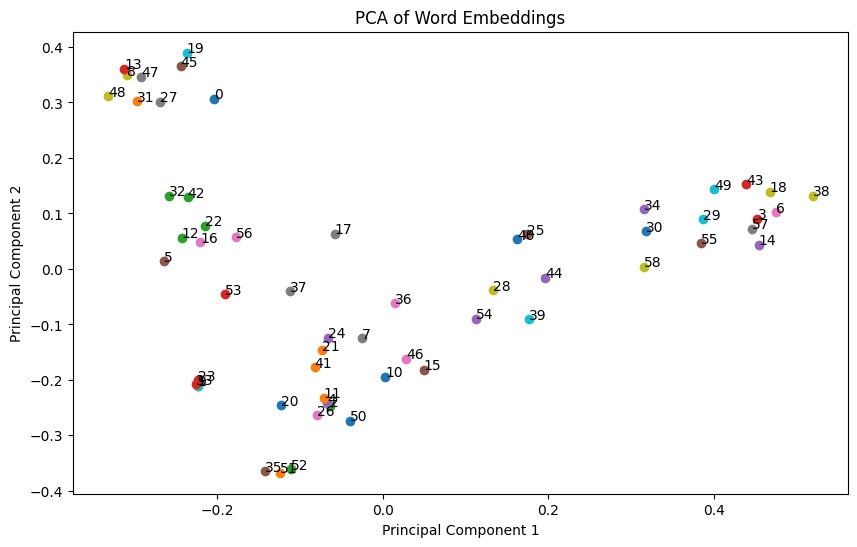

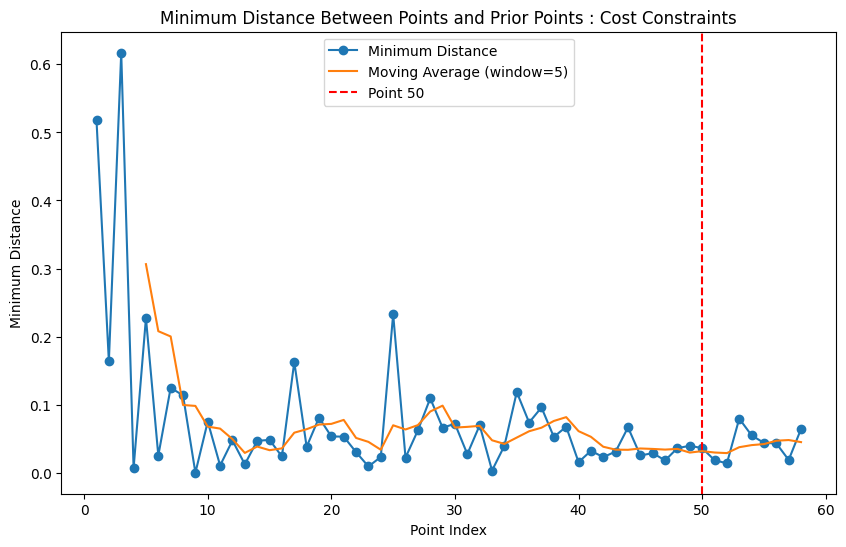

In [46]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = '/content/exp3.xlsx'
df = pd.read_excel(file_path)

# Extract the "ideas" column
ideas = df['ideas']

# Define a variable X for the number of rows to perform embedding on
X = 59  # Change this value to the desired number of rows
ideas_subset = ideas[:X]

# Perform word embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(ideas_subset)
df['vectors'] = embeddings.tolist()


# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Plot the embedded vectors
plt.figure(figsize=(10, 6))
for i, point in enumerate(pca_result):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i))
plt.title('PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Compute the minimum distance between each point and all prior points
min_distances = []
for i in range(1, len(pca_result)):
    distances = [np.linalg.norm(pca_result[i] - pca_result[j]) for j in range(i)]
    min_distances.append(min(distances))

# Calculate the moving average of the minimum distances
window_size = 5  # Change this to your desired window size
moving_average = pd.Series(min_distances).rolling(window=window_size).mean()

# Plot the minimum distances and the moving average
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(min_distances) + 1), min_distances, marker='o', label='Minimum Distance')
plt.plot(range(1, len(min_distances) + 1), moving_average, label=f'Moving Average (window={window_size})')
plt.axvline(x=50, color='r', linestyle='--', label='Point 50')
plt.title('Minimum Distance Between Points and Prior Points : Cost Constraints')
plt.xlabel('Point Index')
plt.ylabel('Minimum Distance')
plt.legend()
plt.show()


# Save DataFrame to Excel file
df.to_excel('/content/exp3.xlsx', index=False, engine='openpyxl')